ФБ-33 Стогнійчук Інна 
Лабораторна робота №4
Структури для роботи з великими обсягами даних в Python

Другий рівень

In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from pandas.plotting import parallel_coordinates
import seaborn as sns

Завантаження датасету

In [56]:
if os.path.exists('cleaned_heart_disease.csv'):
    os.remove('cleaned_heart_disease.csv')
    print("Попередній файл 'cleaned_heart_disease.csv' був видалений.")


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = ['age', 'gender', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 
                'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

df = pd.read_csv(url, header=None, names=column_names)


df.to_csv('cleaned_heart_disease.csv', index=False)
print("Очищений датасет збережено у файлі 'cleaned_heart_disease.csv'.")
display(df.head())

Попередній файл 'cleaned_heart_disease.csv' був видалений.
Очищений датасет збережено у файлі 'cleaned_heart_disease.csv'.


,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Data cleaning

In [57]:
#df.replace("?", pd.NA, inplace=True)

df['ca'] = pd.to_numeric(df['ca'], errors='coerce')
df['thal'] = pd.to_numeric(df['thal'], errors='coerce')

g_map = {1: 'male', 0: 'female'}
df['gender'] = df['gender'].replace(g_map)

display(df)
df.info()
print(df.isnull().sum())

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,male,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,male,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,male,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,male,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,female,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,male,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,male,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,male,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,female,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   gender    303 non-null    object 
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(12), int64(1), object(1)
memory usage: 33.3+ KB
age         0
gender      0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int6

In [72]:
npdata = df.values
print(npdata[-5:])

[[57.0 'female' 4.0 140.0 241.0 0.0 0.0 123.0 1.0 0.2 2.0 0.0 7.0 1
  0.5833333333333334 0.27160046928736103]
 [45.0 'male' 1.0 110.0 264.0 0.0 0.0 132.0 0.0 1.2 2.0 0.0 7.0 1
  0.3333333333333333 -1.0544051095347693]
 [68.0 'male' 4.0 144.0 193.0 1.0 0.0 141.0 0.0 3.4 2.0 2.0 7.0 2 0.8125
  1.4871055832076472]
 [57.0 'male' 4.0 130.0 131.0 0.0 0.0 115.0 1.0 1.2 2.0 1.0 7.0 3
  0.5833333333333334 0.27160046928736103]
 [57.0 'female' 2.0 130.0 236.0 0.0 2.0 174.0 0.0 0.0 2.0 1.0 3.0 1
  0.5833333333333334 0.27160046928736103]]


1 спосіб усунення проблеми пропущених значень - видалення рядків

In [73]:
df.dropna(inplace=True)

print(df.isnull().sum())

age          0
gender       0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
num          0
norm_age     0
stand_age    0
dtype: int64


2 спосіб - заміна на найбільш вживані значення у стовпчику

In [74]:
df['ca'] = df['ca'].fillna(df['ca'].mode()[0])
df['thal'] = df['thal'].fillna(df['thal'].mode()[0])
# Перевірка, чи були замінені пропущені значення
#print(df.isnull().sum())
df.info()
display(df.tail())
#print(df.iloc[89])

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    float64
 1   gender     297 non-null    object 
 2   cp         297 non-null    float64
 3   trestbps   297 non-null    float64
 4   chol       297 non-null    float64
 5   fbs        297 non-null    float64
 6   restecg    297 non-null    float64
 7   thalach    297 non-null    float64
 8   exang      297 non-null    float64
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    float64
 11  ca         297 non-null    float64
 12  thal       297 non-null    float64
 13  num        297 non-null    int64  
 14  norm_age   297 non-null    float64
 15  stand_age  297 non-null    float64
dtypes: float64(14), int64(1), object(1)
memory usage: 39.4+ KB


,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,norm_age,stand_age
297,57.0,female,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1,0.583333,0.271600
298,45.0,male,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,0.333333,-1.054405
299,68.0,male,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,0.812500,1.487106
300,57.0,male,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,0.583333,0.271600
301,57.0,female,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,0.583333,0.271600


Numpy

In [75]:
# Заміна пропущених значень у стовпцях 'ca' та 'thal' 
npdata = np.genfromtxt('cleaned_heart_disease.csv', delimiter=',', dtype=str, skip_header=1)
npdata[npdata[:, 11] == '?', 11] = np.nan  # Для 'ca'
npdata[npdata[:, 12] == '?', 12] = np.nan
ca_median = np.nanmedian(npdata[:, 11].astype(float)) 
thal_median = np.nanmedian(npdata[:, 12].astype(float))  

ca_column = npdata[:, 11]  
thal_column = npdata[:, 12] 

ca_column[np.isnan(ca_column.astype(float))] = ca_median
thal_column[np.isnan(thal_column.astype(float))] = thal_median

# Оновлення стовпців у масиві
npdata[:, 11] = ca_column  
npdata[:, 12] = thal_column  

print('Кількість нулів у стовпцях:')
print(np.isnan(npdata[:, 11].astype(float)).sum())
print(np.isnan(npdata[:, 12].astype(float)).sum())

print(npdata[-5:])

Кількість нулів у стовпцях:
0
0
[['45.0' '1.0' '1.0' '110.0' '264.0' '0.0' '0.0' '132.0' '0.0' '1.2'
  '2.0' '0.0' '7.0' '1']
 ['68.0' '1.0' '4.0' '144.0' '193.0' '1.0' '0.0' '141.0' '0.0' '3.4'
  '2.0' '2.0' '7.0' '2']
 ['57.0' '1.0' '4.0' '130.0' '131.0' '0.0' '0.0' '115.0' '1.0' '1.2'
  '2.0' '1.0' '7.0' '3']
 ['57.0' '0.0' '2.0' '130.0' '236.0' '0.0' '2.0' '174.0' '0.0' '0.0'
  '2.0' '1.0' '3.0' '1']
 ['38.0' '1.0' '3.0' '138.0' '175.0' '0.0' '0.0' '173.0' '0.0' '0.0'
  '1.0' '0.0' '3.0' '0']]


In [76]:
file_path = 'result_df.csv'

if os.path.exists(file_path):
    os.remove(file_path)

df.to_csv(file_path, index=False)
#npdata = np.genfromtxt(file_path, delimiter=',', dtype=str, skip_header=1)
#print(npdata)

2. Нормалізація та стандартизація віку

In [77]:
def normalize_and_standardize_age(df):
    min_age = df['age'].min()
    max_age = df['age'].max()
    mean_age = df['age'].mean()
    std_age = df['age'].std()
    
    df['norm_age'] = (df['age'] - min_age) / (max_age - min_age)
    df['stand_age'] = (df['age'] - mean_age) / std_age
    
    return df

# Виклик функції для нормалізації та стандартизації віку
df = normalize_and_standardize_age(df)
print(df[['age', 'norm_age', 'stand_age']].head())

    age  norm_age  stand_age
0  63.0  0.708333   0.934603
1  67.0  0.791667   1.376605
2  67.0  0.791667   1.376605
3  37.0  0.166667  -1.938409
4  41.0  0.250000  -1.496407


In [78]:
import numpy as np

def normalize_and_standardize_age(nparray):
    nparray = nparray.astype(float)
    age = nparray[:, 0]
    min_age = np.min(age)
    max_age = np.max(age)
    mean_age = np.mean(age)
    std_age = np.std(age)
    
    norm_age = (age - min_age) / (max_age - min_age)
    stand_age = (age - mean_age) / std_age
    return np.column_stack((age, norm_age, stand_age))

np.set_printoptions(precision=3)
result = normalize_and_standardize_age(npdata)
print(result)

[[ 6.300e+01  7.083e-01  9.487e-01]
 [ 6.700e+01  7.917e-01  1.392e+00]
 [ 6.700e+01  7.917e-01  1.392e+00]
 [ 3.700e+01  1.667e-01 -1.933e+00]
 [ 4.100e+01  2.500e-01 -1.489e+00]
 [ 5.600e+01  5.625e-01  1.730e-01]
 [ 6.200e+01  6.875e-01  8.379e-01]
 [ 5.700e+01  5.833e-01  2.838e-01]
 [ 6.300e+01  7.083e-01  9.487e-01]
 [ 5.300e+01  5.000e-01 -1.595e-01]
 [ 5.700e+01  5.833e-01  2.838e-01]
 [ 5.600e+01  5.625e-01  1.730e-01]
 [ 5.600e+01  5.625e-01  1.730e-01]
 [ 4.400e+01  3.125e-01 -1.157e+00]
 [ 5.200e+01  4.792e-01 -2.703e-01]
 [ 5.700e+01  5.833e-01  2.838e-01]
 [ 4.800e+01  3.958e-01 -7.136e-01]
 [ 5.400e+01  5.208e-01 -4.864e-02]
 [ 4.800e+01  3.958e-01 -7.136e-01]
 [ 4.900e+01  4.167e-01 -6.027e-01]
 [ 6.400e+01  7.292e-01  1.060e+00]
 [ 5.800e+01  6.042e-01  3.946e-01]
 [ 5.800e+01  6.042e-01  3.946e-01]
 [ 5.800e+01  6.042e-01  3.946e-01]
 [ 6.000e+01  6.458e-01  6.163e-01]
 [ 5.000e+01  4.375e-01 -4.919e-01]
 [ 5.800e+01  6.042e-01  3.946e-01]
 [ 6.600e+01  7.708e-01  1.2

3. Збудувати гістограму по одному із атрибутів, що буде показувати на кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.

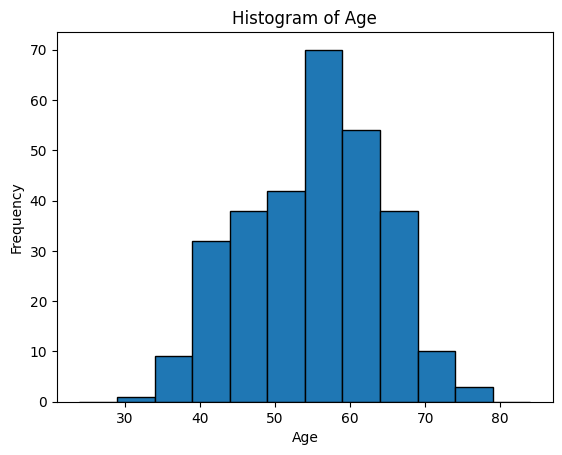

In [79]:
bins = [i for i in range(24, 85, 5)]

age_range = (df['age'].min(), df['age'].max())

plt.hist(df['age'], bins, range=age_range, edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

4. Збудувати графік залежності одного integer/real атрибута від іншого.

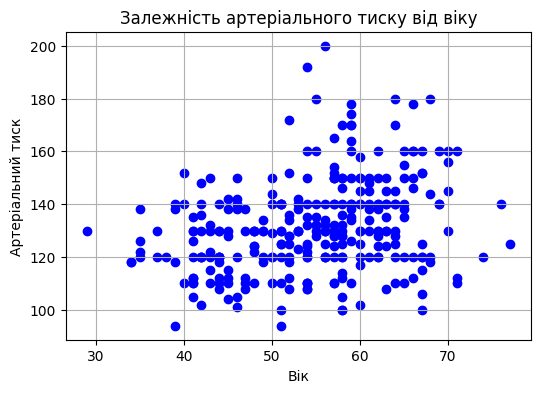

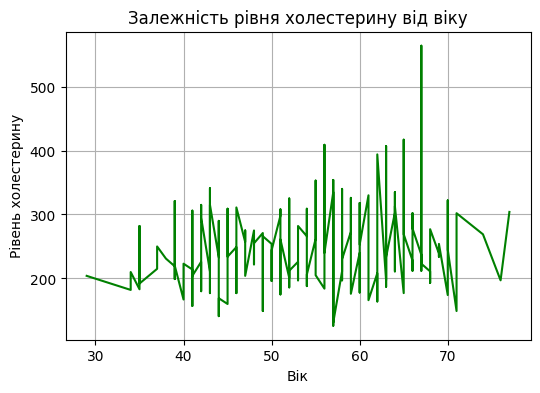

In [80]:
df_sorted = df.sort_values(by='age')

x = df_sorted['age']
y1 = df_sorted['trestbps']
y2 = df_sorted['chol']

# Scatter plot: артеріальний тиск
plt.figure(figsize=(6, 4))
plt.scatter(x, y1, color='blue')
plt.title('Залежність артеріального тиску від віку')
plt.xlabel('Вік')
plt.ylabel('Артеріальний тиск')
plt.grid(True)
plt.show()

# Лінійний графік: рівень холестерину
plt.figure(figsize=(6, 4))
plt.plot(x, y2, color='green')
plt.title('Залежність рівня холестерину від віку')
plt.xlabel('Вік')
plt.ylabel('Рівень холестерину')
plt.grid(True)
plt.show()

5. Підрахувати коефіцієнт Пірсона та Спірмена для двох integer/real атрибутів.

In [81]:
x = df['age']
y = df['trestbps']

pearson_corr = stats.pearsonr(x, y).statistic
spearman_corr = stats.spearmanr(x, y).statistic

print("Коефіцієнт кореляції Пірсона:", pearson_corr)
print("Коефіцієнт кореляції Спірмена:", spearman_corr)

Коефіцієнт кореляції Пірсона: 0.29047626246129754
Коефіцієнт кореляції Спірмена: 0.29960965493061253


6. Провести One Hot Encoding категоріального string атрибуту.

In [82]:
def OneHotEncoding(df):
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
    
    encoder = OneHotEncoder(sparse_output=False)
    one_hot_encoded = encoder.fit_transform(df[categorical_columns])
    
    one_hot_df = pd.DataFrame(
        one_hot_encoded,
        columns=encoder.get_feature_names_out(categorical_columns),
        index=df.index  # синхронізація індексів!
    )
    
    df_encoded = pd.concat([df.drop(categorical_columns, axis=1), one_hot_df], axis=1)
    return df_encoded.head()

7. Провести візуалізацію багатовимірних даних

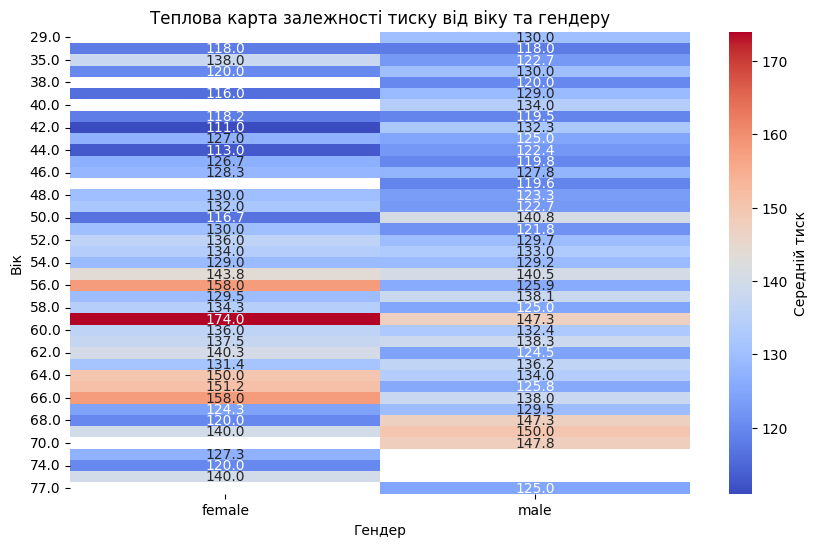

In [83]:
data = df[['age', 'gender', 'trestbps']]

grouped_data = data.groupby(['gender', 'age']).mean().reset_index()
pivot_data = grouped_data.pivot(index='age', columns='gender', values='trestbps')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data, cmap='coolwarm', annot=True, fmt=".1f", cbar_kws={'label': 'Середній тиск'})
plt.title('Теплова карта залежності тиску від віку та гендеру')
plt.xlabel('Гендер')
plt.ylabel('Вік')
plt.show()

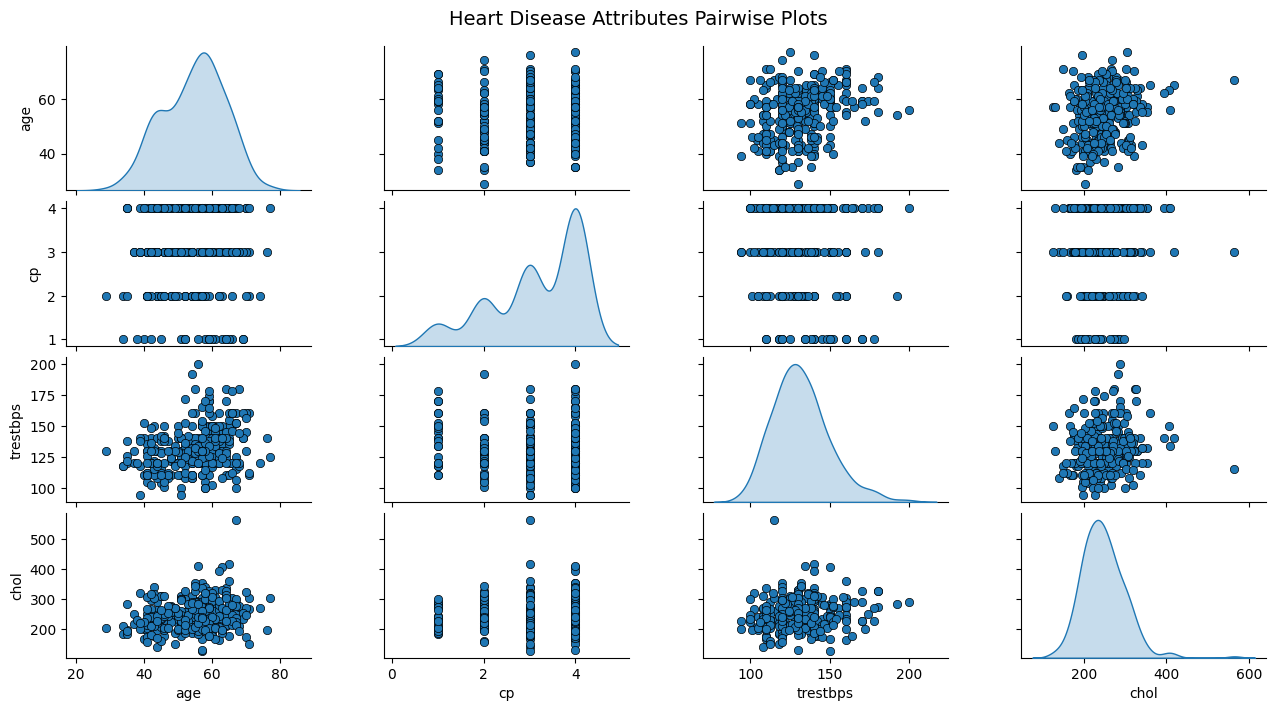

In [84]:
cols = ['age', 'gender', 'cp', 'trestbps', 'chol']
pp = sns.pairplot(df[cols], height=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(fill=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Heart Disease Attributes Pairwise Plots', fontsize=14)

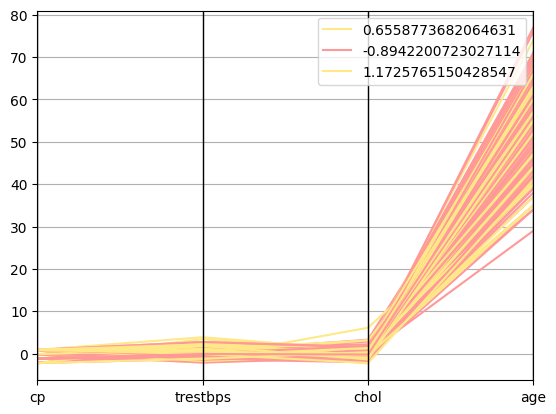

In [88]:
cols = ['thal', 'cp', 'trestbps', 'chol']
subset_df = df[cols]


if subset_df.isna().sum().any():
    subset_df = subset_df.dropna() 

ss = StandardScaler()
scaled_df = ss.fit_transform(subset_df)
scaled_df = pd.DataFrame(scaled_df, columns=cols)


final_df = pd.concat([scaled_df, df['age']], axis=1)


if final_df.isna().sum().any():
    final_df = final_df.dropna()


final_df['thal'] = final_df['thal'].astype('category')


pc = parallel_coordinates(final_df, 'thal', color=('#FFE888', '#FF9999'))
